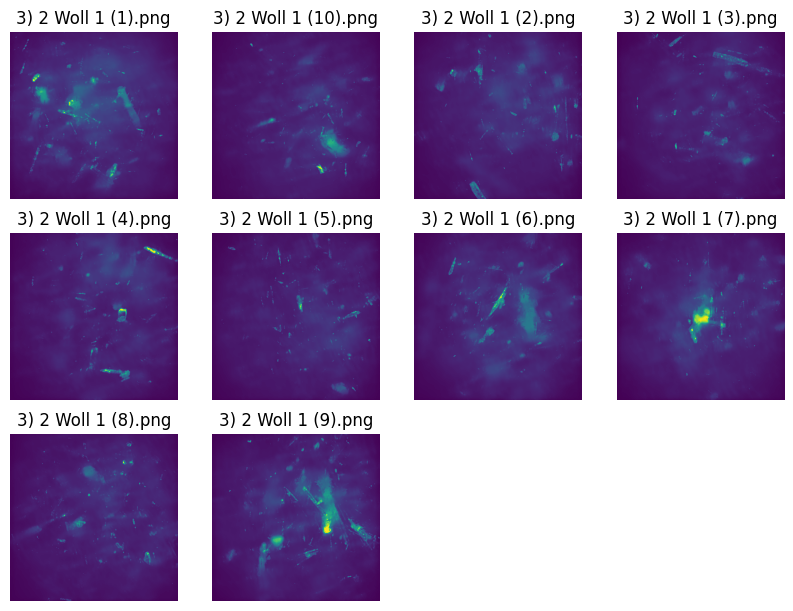

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define image directory
image_directory = 'C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/1_wt_%_100/'

# Ensure directory exists
if not os.path.exists(image_directory):
    raise ValueError("Image directory does not exist.")

# Display images
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 4

# Load and display images
for i, image_name in enumerate(os.listdir(image_directory)):
    if image_name.endswith('.png') or image_name.endswith('.jpg'):
        image_path = os.path.join(image_directory, image_name)
        image = Image.open(image_path)
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)

plt.show()

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [7]:
datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.05,   #% shift
        height_shift_range=0.05,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=0)    #Also try nearest, constant, reflect, wrap

In [34]:

x_gray = io.imread('C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/1_wt_%_100/3) 2 Woll 1 (10).png')
x_gray = x_gray[np.newaxis, ..., np.newaxis]

print("Shape of grayscale image:", x_gray.shape)

Shape of grayscale image: (1, 1504, 1504, 1)


In [35]:
i = 0
for batch in datagen.flow(x_gray, batch_size=16,  
                          save_to_dir='C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/1_wt_%_100/augmented/', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 100:
        break  